**np.save와 np.load 함수는 배열 데이터를 효과적으로 저장하고 불러오기 위한 함수<br><br>
+)기본적으로 압축되지 않은 원시(가공되지 않은) 바이너리 형식의 .npy 파일로 저장됨<br>
+)numpy 배열은 npy, npz, csv, txt, dat 형식을 제공함. npy 형식은 1개의 배열을 일반적인 방식으로 저장하는 형식이고, npz 형식은 여러 개의 배열   을 압축여부를 선택할 수 있는 형식임**


In [2]:
import numpy as np
arr = np.arange(10)

np.save('some_array', arr)

In [3]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**여러 배열을 압축적으로 저장하려면 np.savez 함수를 사용해야 함. Savez 뒤에 저장할 이름과 저장할 배열을 적어줘야 함<br><br>
+)npz 파일을 읽어올때도 동일하게 load 함수를 이용가능함**

In [4]:
np.savez('array_archive.npz', a=arr, b=arr)

**npz 파일을 불러올 때는 각각의 배열을 필요할 때 불러올 수 있도록 딕셔너리 형식의 객체에 저장함**

In [5]:
arch = np.load('array_archive.npz')

arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**압축이 잘되는 형식의 데이터라면 np.savez_compressed를 사용**

**주의)np.savez vs np.savez_compressed<br>
      np.savez() : 여러개의 배열을 1개의 압축되지 않은 *.npz 포맷 파일로 저장<br>
      np.savez_compressed() : 여러개의 배열을 1개의 압축된 *.npz 포맷 파일로 저장**

In [6]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

--선형대수--<br>
**두 개의 2차원 배열을 * 연산자로 곱하면 행렬 곱셈이 아니라 대응하는 각각의 원소의 곱을 계산함<br>
행렬 곱셈은 배열 메서드이자 numpy 네임스페이스 안에 있는 dot 함수를 이용해서 계산함**

In [7]:
x = np.array([[1.,2.,3.], [4., 5., 6.]])

y = np.array([[6.,23.], [-1, 7], [8, 9]])

x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [8]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [9]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

**x.dot(y)는 np.dot(x, y)와 동일함**

In [10]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

**2차원 배열과 곱셈이 가능한 크기의 1차원 배열 간의 행렬 곱셈의 결과는 1차원 배열임**

In [11]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In [12]:
np.ones(3)

array([1., 1., 1.])

**@ 기호는 행렬 곱셈을 수행하는 연산자임**

In [13]:
x @ np.ones(3)

array([ 6., 15.])

**numpy.linalg는 선형대수를 지원하는 패키지로 행렬의 분할과 역행렬, 행렬식과 같은 것들을 포함하고 있음. 이는 매트랩, R같은 언어에서 사용하는 표준 포트란 라이브러리인 BLAS, LAPACK 또는 Intel MKL을 사용해서 구현됨<br>**

**+) inv(=행렬의 역행렬을 계산)<br>
     qr(=QR 분해를 계산)<br>
+) X.T.dot(X)는 X.T.의 전치행렬(=transpose matrix)과 X의 곱을 계산한다**

In [14]:
from numpy.linalg import inv, qr

X = np.random.randn(5, 5)

mat = X.T.dot(X)

inv(mat)

array([[11.40293889, -2.02971736,  5.19343862, -1.94179554,  3.4975129 ],
       [-2.02971736,  0.60565759, -0.88364852,  0.54637648, -0.52181667],
       [ 5.19343862, -0.88364852,  2.5524473 , -0.76277719,  1.60883631],
       [-1.94179554,  0.54637648, -0.76277719,  1.00777532, -0.59654042],
       [ 3.4975129 , -0.52181667,  1.60883631, -0.59654042,  1.22187091]])

In [15]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  4.18154776e-16, -9.94208996e-16,
         4.31208125e-16,  2.19506680e-15],
       [ 7.69898376e-15,  1.00000000e+00, -7.88725914e-16,
         1.75198118e-16,  1.94026467e-15],
       [-3.84383118e-15, -7.36348080e-16,  1.00000000e+00,
        -2.77279637e-16, -9.10440152e-16],
       [-7.11654893e-16, -1.21770176e-16, -1.50937852e-16,
         1.00000000e+00,  2.60012909e-16],
       [-3.04027876e-15, -2.27348669e-16,  2.40288456e-17,
        -1.85840969e-16,  1.00000000e+00]])

In [37]:
q, r = qr(mat)

r

array([[-6.00567019, -8.67133608,  3.3063446 ,  1.89211281, 10.55154595],
       [ 0.        , -6.91044295, -4.98474513,  3.5364982 ,  5.41405184],
       [ 0.        ,  0.        , -3.34490272,  0.36720695,  5.17470938],
       [ 0.        ,  0.        ,  0.        , -1.3554548 , -0.77075629],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.2429499 ]])

**자주 사용하는 numpy.linalg 함수<br>
• diag : 정사각 행렬의 대각/비대각 원소를 1차원 배열로 반환하거나, 1차원 배열을 대각선 원소로 하고 나머지는 0으로 채운 단위행렬을 반환한다<br>
• dot : 행렬 곱셈<br>
• trace : 행렬의 대각선 원소의 합을 계산한다<br>
• det : 행렬식을 계산한다<br>
• eig : 정사각 행렬의 고윳값과 고유벡터를 계산한다<br>
• inv : 정사각 행렬의 역행렬을 계산한다<br>
• pinv : 정사각 행렬의 무어-펜로즈 유사역원 역행렬을 구한다<br>
• qr : QR 분해를 계산한다<br>
• svd : 특잇값 분해(SVD)를 계산한다<br>
• solve : A가 정사각 행렬일 때 Ax = b를 만족하는 x를 구한다<br>
• lstsq : Ax = b를 만족하는 최소제곱해를 구한다**

--난수 생성--

**numpy.random 모듈은 파이썬 내장 random 함수를 보강하여 다양한 종류의 확률분포로부터 효과적으로 표본값을 생성하는데 주로 사용됨<br><br>
ex) normal을 사용하여 표준정규분포로부터 4x4 크기의 표본을 생성할 수 있음**

In [17]:
samples = np.random.normal(size=(4, 4))

samples

array([[-1.70686757, -0.9991204 , -1.65280247, -0.95364324],
       [ 1.90522139, -0.42500352,  1.2396113 , -1.07743814],
       [-0.40616293, -2.64710368,  0.88079412,  1.00149506],
       [-0.18872623,  0.51301399,  0.57598609,  2.18628457]])

**이에 비해 파이썬 내장 random 모듈은 한 번에 하나의 값만 생성할 수 있음<br>
numpy.random은 매우 큰 표본을 생성하지만 파이썬 내장 모듈보다 수십 배 이상 빠름<br><br>
+)noramlvariate 함수(mu, sigma)<br>
+)%timeit 함수는 특정 코드 조각 (단일 실행 문 또는 단일 메서드)의 시간을 측정하는 데 사용할 수 있는 ipython 매직 함수**

In [18]:
from random import normalvariate

N = 1000000

%timeit samples = [normalvariate(0, 1) for _ in range(N)]
# 1.77 s +- 126 ms per loop (mean +- std. dev. of 7 runs, 1 loop each)

%timeit np.random.normal(size=N)
# 61.7 ms +- 1.32 ms per loop (mean +- std. dev. of 7 runs, 10 loops each)

752 ms ± 5.33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
40.1 ms ± 796 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


**이를 엄밀하게는 유사난수라고 부르는데, 난수 생성기의 시드값에 따라 정해진 난수를 알고리즘으로 생성하기 때문.<br>
numpy 난수 생성기의 시드값은 밑의 코드와 같이 np.random.seed를 이용해서 변경할 수 있음**

In [19]:
np.random.seed(1234)

**numpy.random에서 제공하는 데이터를 생성할 수 있는 함수들은 전역 난수 시드값을 이용함.<br>
numpy.random.RandomState를 이용해서 다른 난수 생성기로부터 격리된 난수 생성기를 만들 수 있음**

In [20]:
rng = np.random.RandomState(1234)

rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

**일부 numpy.random 함수<br>
• seed : 난수 생성기의 시드를 지정한다<br>
• permutation : 순서를 임의로 바꾸거나 임의의 순열을 반환한다<br>
• shuffle : 리스트나 배열의 순서를 뒤섞는다<br>
• rand : 균등분포에서 표본을 추출한다<br>
• randint : 주어진 최소/최대 범위 안에서 임의의 난수를 추출한다<br>
• randn : 표준편차가 1이고 평균값이 0인 정규분포(매트랩과 같은 방식)에서 표본을 추출한다<br>
• binomial : 이항분포에서 표본을 추출한다<br>
• normal : 정규분포(가우시안)에서 표본을 추출한다<br>
• beta : 베타분포에서 표본을 추출한다<br>
• chisquare : 카이제곱분포에서 표본을 추출한다<br>
• gamma : 감마분포에서 표본을 추출한다<br>
• uniform : 균등 [0,1)분포에서 표본을 추출한다**


--계단 오르내리기 예제--

**계단 오르내리기 예제는 배열 연산의 활용을 보여줄 수 있는 간단한 애플리케이션임. 계단 중간에서 같은 확률로 한 계단 올라가거나 내려간다고 가정하자.
순수 파이썬으로 내장 random 모듈을 사용하여 계단 오르내리기를 1000번 수행하는 코드는 다음처럼 작성할 수 있다.**

In [21]:
import random
import matplotlib.pyplot as plt

position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

**처음 100회의 계단 오르내리기를 그래프 나타낸 것이다.**

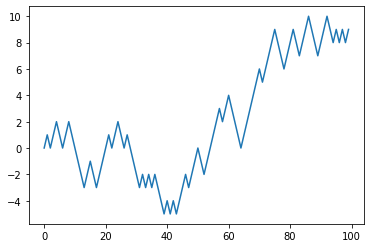

In [22]:
plt.plot(walk[:100])

**walk는 계단을 오르거나(+1) 내려간(-1) 값의 누적합이라는 사실을 알 수 있으며 배열식으로 나타낼 수 있다. 그래서 np.random 모듈을 사용해서 1000번 수행한 결과(1, -1)를 한 번에 저장하고 누적합을 계산한다.<br><br>
+)np.where 함수는 np.where(조건, 조건이 참일 때 입력되는 값, 조건이 거짓일 때 입력되는 값)**

In [23]:
nsteps = 1000

draws = np.random.randint(0, 2, size=nsteps)

steps = np.where(draws > 0, 1, -1)

walk = walk = steps.cumsum()

**이것으로 계단을 오르내린 위치의 최솟값과 최댓값 같은 간단한 통계를 구할 수 있다.**

In [24]:
walk.min()

-9

In [25]:
walk.max()

60

**계단에서 특정 위치에 도달하기까지의 시간 같은 좀 더 복잡한 통계를 구할 수 있는데, 계단의 처음 위치에서 최초로 10칸 떨어지기까지 얼마나 걸렸는지 확인해보자. np.abs(walk) >= 10 으로 처음 위치에서 10칸 이상 떨어진 시점을 알려주는 불리언 배열을 얻을 수 있다. 우리는 최초의 10 혹은 -10인 시점을 구해야 하므로 불리언 배열에서 최댓값의 처음 색인을 반환하는 argmax를 사용하자(True가 최댓값이다).<br><br>
+)argmax 함수는 array에 존재하는 최댓값의 인덱스를 추출해줍니다.**

In [26]:
(np.abs(walk) >= 10).argmax()

297

**여기서 argmax를 사용했지만 argmax는 배열 전체를 모두 확인하기 때문에 효과적인 방법은 아니다. 또한 이 예제에서는 True가 최댓값임을 이미 알고 있었다.**

-- 한 번에 시뮬레이션하기 --

**계단 오르내리기를 많은 횟수(대략 5000회 정도) 시뮬레이션하더라도 위 코드를 조금만 수정해서 해결할 수 있다. numpy.random 함수에 크기가 2인 튜플을 넘기면 2차원 배열이 생성되고 각 컬럼에서 누적합을 구해서 5000회의 시뮬레이션을 한 방에 처리할 수 있다.**

In [27]:
nwalks = 5000

nsteps = 1000

draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 또는 1

steps = np.where(draws > 0, 1, -1)

walks = steps.cumsum(1)

walks

array([[  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       [  1,   2,   3, ..., -26, -27, -28],
       ...,
       [  1,   0,   1, ...,  64,  65,  66],
       [  1,   2,   1, ...,   2,   1,   0],
       [ -1,  -2,  -3, ...,  32,  33,  34]])

**이제 모든 시뮬레이션에 대해 최댓값과 최솟값을 구해보자.**

In [28]:
walks.max()

122

In [29]:
walks.min()

-128

**이 데이터에서 누적합이 30 혹은 -30이 되는 최소 시점을 계산해보자. 5000회의 시뮬레이션중 모든 경우가 30에 도달하지 않기 때문에 약간 까다로운데, any메서드를 이용해서 해결할 수 있다.<br><br>
+) any 메서드는 특정 조건을 충족하는 요소가 있는지 없는지 검사할 때 사용합니다.**

In [30]:
hits30 = (np.abs(walks) >= 30).any(1)

hits30

array([ True,  True,  True, ...,  True, False,  True])

In [31]:
hits30.sum() #누적합이 30 또는 -30이 되는 경우의 수

3368

**이 불리언 배열을 사용해서 walks에서 컬럼을 선택하고 절댓값이 30을 넘는 경우에 대해 축 1의 argmax 값을 구하면 처음 위치에서 30칸 이상 멀어지는 최소 횟수를 구할 수 있다.**

In [32]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
                  
crossing_times.mean()

509.99762470308787